In [1]:
### HAVING DONE MULTIPLE ATTEMPTS OF MODELING, FROM SCALER,CV, I WANT TO MOVE ON TO CLASS HYPERPARAMETER TUNING AND CLASS IMBALANCE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_confusion_matrix
import xgboost as xgb




In [5]:
file_path = "/Users/JuanDiego/Documents/Proyectos Julio 2023/Customer-Churn-Data-Cleaned.csv"

df_initial_models = pd.read_csv(file_path)


In [6]:
df_initial_models.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Age Bracket
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0,"(40.2, 47.6]"
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0,"(40.2, 47.6]"
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0,"(40.2, 47.6]"
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0,"(32.8, 40.2]"
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0,"(40.2, 47.6]"


In [11]:
### IM STARTING WITH ADVANCED MODELING THE IDEA IS TO USE BETTER HYPERPARAMETER TUNING THAT IMPROVES MODELS AS NOTMAL FEATURE SELECTION, DATA SPLIT, AND SCALING

# Feature Selection
features = ['CreditScore', 'Age', 'IsActiveMember', 'Balance', 'NumOfProducts']
X = df_initial_models[features]
y = df_initial_models['Exited']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)








In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Metrics with Hyperparameter Tuning:
Accuracy: 0.812
Precision: 0.6620689655172414
Recall: 0.15711947626841244
F1 Score: 0.25396825396825395


/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


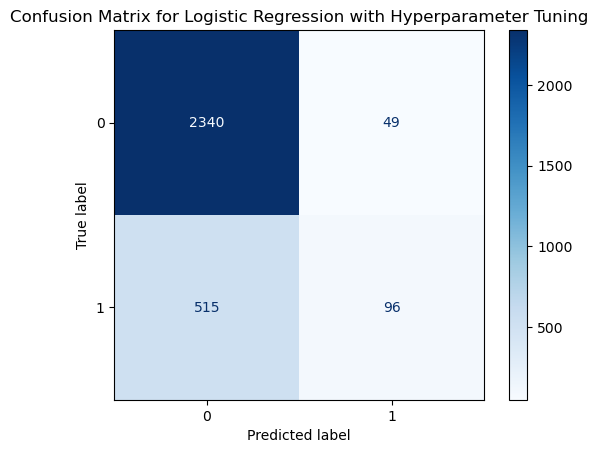

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   2.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   2.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   1.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; tot

In [15]:
### applyting hyperparameter tuning for logistic regression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a basic logistic regression model
logistic = LogisticRegression()

# Use GridSearchCV with the parameter grid
grid_search = GridSearchCV(logistic, param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Using the best model from grid search
Logistic_regression_3 = grid_search.best_estimator_

# Predicting the test set
y_pred = Logistic_regression_3.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Metrics with Hyperparameter Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix Visualization
plot_confusion_matrix(Logistic_regression_3, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression with Hyperparameter Tuning")
plt.show()




Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END ma

/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


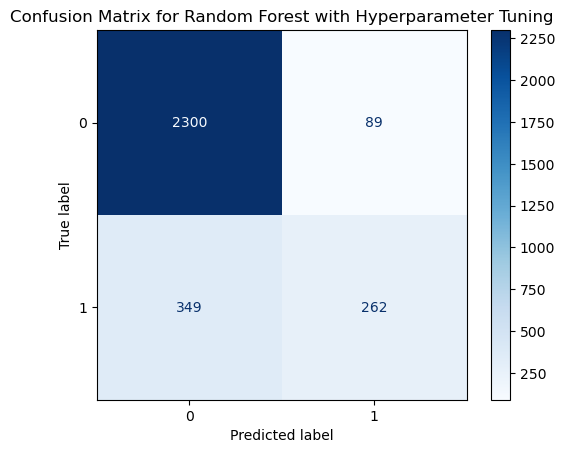

In [23]:
### hyperparameter tuning

## MODEL NAME: Random_Forest_3

## Necessary Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix

# Data Preparation (Assuming df_initial_models is loaded and the necessary features are selected)
features = ['CreditScore', 'Age', 'IsActiveMember', 'Balance', 'NumOfProducts']
X = df_initial_models[features]
y = df_initial_models['Exited']

# Splitting the data (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train_scaled, y_train)

# Extracting the best model
Random_Forest_3 = grid_search.best_estimator_

best_hyperparameters_rf = grid_search.best_params_
print("Best Hyperparameters for Random_Forest_3:", best_hyperparameters_rf)


# Making predictions on the test dataset
y_pred = Random_Forest_3.predict(X_test_scaled)

# Evaluation
print("Random Forest Metrics with Hyperparameter Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix Visualization
plot_confusion_matrix(Random_Forest_3, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix for Random Forest with Hyperparameter Tuning")
plt.show()


Best Hyperparameters for Random_forest_3: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Fitting 10 folds for each of 432 candidates, totalling 4320 fits


/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] 

/Users/JuanDiego/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


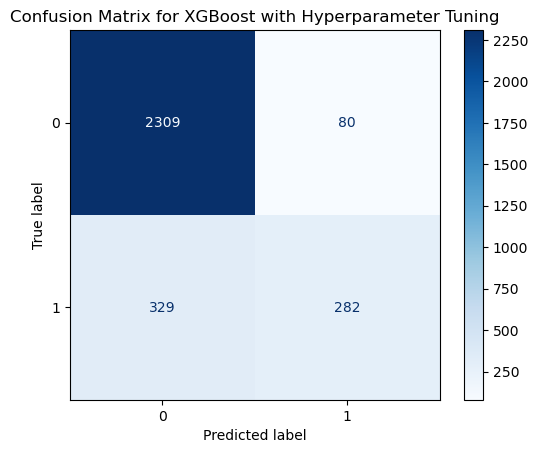

In [24]:
## MODEL NAME: XGBoost_3

## Necessary Libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix

# Data Preparation (Assuming df_initial_models is loaded and the necessary features are selected)
features = ['CreditScore', 'Age', 'IsActiveMember', 'Balance', 'NumOfProducts']
X = df_initial_models[features]
y = df_initial_models['Exited']

# Splitting the data (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting up the parameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# Initializing the XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Setting up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=10, n_jobs=-1, verbose=2)

# Fitting the model
grid_search_xgb.fit(X_train_scaled, y_train)

# Extracting the best model
XGBoost_3 = grid_search_xgb.best_estimator_

# Making predictions on the test dataset
y_pred_xgb = XGBoost_3.predict(X_test_scaled)

# Evaluation
print("XGBoost Metrics with Hyperparameter Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

# Extracting the best hyperparameters
best_hyperparameters_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters for XGBoost_3:", best_hyperparameters_xgb)

# Confusion Matrix Visualization
plot_confusion_matrix(XGBoost_3, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix for XGBoost with Hyperparameter Tuning")
plt.show()

In [25]:
#### PLOTTING WITH ROC CURVE THE LAST 3 MODELS WITH HYPERPARAMETER TUNING . FIRST PREDICTIONS FOR EACH MODEL
y_pred_prob_lr = Logistic_regression_3.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_rf = Random_Forest_3.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_xgb = XGBoost_3.predict_proba(X_test_scaled)[:, 1]


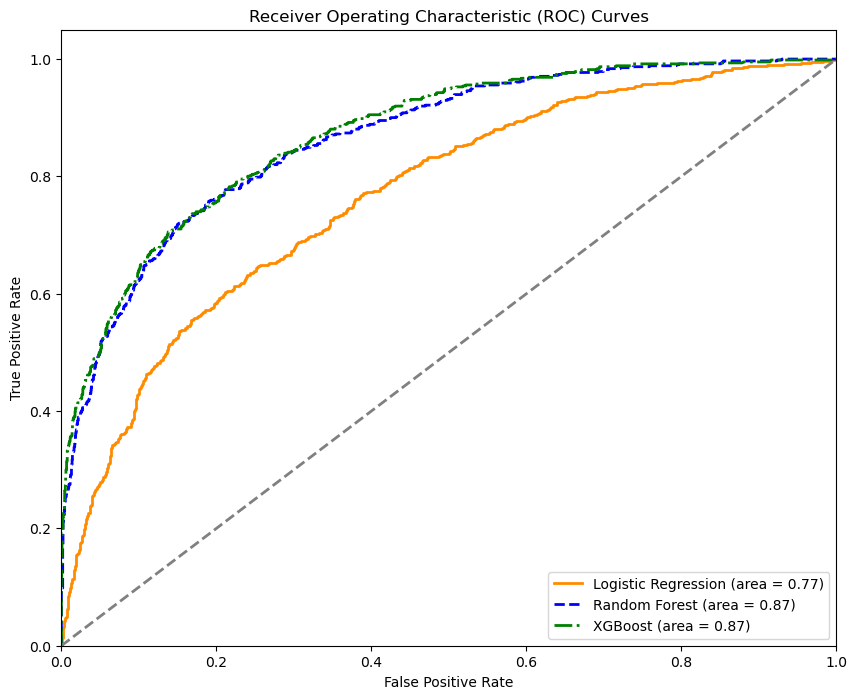

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

# Plot the ROC curve
plt.figure(figsize=(10,8))
lw = 2

# Plot for Logistic Regression
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=lw, linestyle='-', label=f'Logistic Regression (area = {roc_auc_lr:.2f})')

# Plot for Random Forest
plt.plot(fpr_rf, tpr_rf, color='blue', lw=lw, linestyle='--', label=f'Random Forest (area = {roc_auc_rf:.2f})')

# Plot for XGBoost
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=lw, linestyle='-.', label=f'XGBoost (area = {roc_auc_xgb:.2f})')

# Plotting Base Line
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
